### Introdução

Neste estudo, a meta é mergulhar fundo nas relações que existem entre as características físicas de um imóvel, como metragem e número de cômodos, com seu preço e localização. A ideia é entender, principalmente, o que está por trás dos preços dos imóveis de São Paulo, uma das metrópoles mais agitadas e desafiadoras do Brasil. Os dados aqui analisados foram baixados na plataforma do Kaggle, bastante popular por suas competições de Machine Learning, e foram originadas de uma raspagem realizada no site do Quinto Andar, em março de 2023. <br>

Link para o dataset: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices <br>

Definição das colunas da tabela: <br>
- Endereço: O endereço do imóvel
- Bairro: O bairro onde o imóvel está localizado
- Área: A área do imóvel em metros quadrados
- Quartos: O número de quartos no imóvel
- Garagem: O número de vagas de estacionamento disponíveis no imóvel
- Aluguel: O aluguel mensal do imóvel
- Tipo: O tipo do imóvel (apartamento, casa, etc.)
- Total: O custo total do imóvel, incluindo aluguel, impostos e outras taxas.

### Importando as bibliotecas

In [100]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np

# Biblitecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurar para não exibir warnings
import warnings

warnings.filterwarnings("ignore")

# Configurar o estilo de gráfico do ggplot
plt.style.use("ggplot")

# Configurar para exibir até 15 linhas de um DataFrame do Pandas
pd.set_option("display.max_rows", 15)

# Configurar para exibir todas as colunas de um DataFrame do Pandas
pd.set_option("display.max_columns", None)

from IPython.display import Image, display

### Importando o dataset

In [101]:
aptos = pd.read_csv('../data/data.csv')
aptos.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [102]:
print(f"O data frame possui {aptos.shape[0]} linhas e {aptos.shape[1]} colunas.")

O data frame possui 11657 linhas e 8 colunas.


In [103]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [104]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = aptos.select_dtypes(include=numerics)

nao_numericas = aptos.select_dtypes(exclude=numerics)

print(f"Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas.")

Temos 5 colunas numéricas e 3 colunas não-numéricas.


### Explorando os dados <br>
Primeiro, vamos olhar as distribuições dos preços, uma das variáveis que mais chamam atenção nos dados!

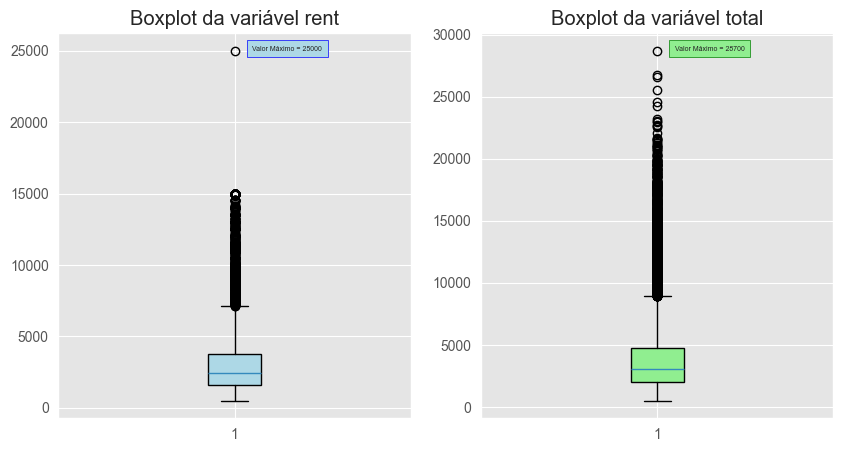

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(10,5)) # Cria uma figura com 2 subplots

# Cria um boxplot para a variável 'rent' no primeiro subplot
bp1 = axs[0].boxplot(aptos['rent'], patch_artist=True)
axs[0].set_title('Boxplot da variável rent')

# Define a cor do boxplot
bp1['boxes'][0].set_facecolor('lightblue')

# Adiciona a legenda do valor máximo
max_rent = np.max(aptos['rent'])
axs[0].annotate(f'Valor Máximo = {max_rent}',
                xy=(1, max_rent),
                xytext=(1.05, max_rent),
                bbox=dict(facecolor='lightblue', edgecolor='blue'),
                fontsize=5) # Modifica a fonte para um tamanho menor

# Cria um boxplot para a variável 'total' no segundo subplot
bp2 = axs[1].boxplot(aptos['total'], patch_artist=True)
axs[1].set_title('Boxplot da variável total')

# Define a cor do boxplot
bp2['boxes'][0].set_facecolor('lightgreen')

# Adiciona a legenda do valor máximo
max_total = np.max(aptos['total'])
axs[1].annotate(f'Valor Máximo = {max_total}',
                xy=(1, max_total),
                xytext=(1.05, max_total),
                bbox=dict(facecolor='lightgreen', edgecolor='green'),
                fontsize=5) # Modifica a fonte para um tamanho menor

# Mostra os gráficos
plt.show()

Existem diversos outliers, inclusive, embora a mediana esteja abaixo de 5 mil, vemos em destaque que o valor máximo de ambos chega acima do valor de 20 mil - sendo que o valor total ultrapassa 28 mil. <br> <br>
Abaixo, a distribuição da mediana no desenho de um histograma: 

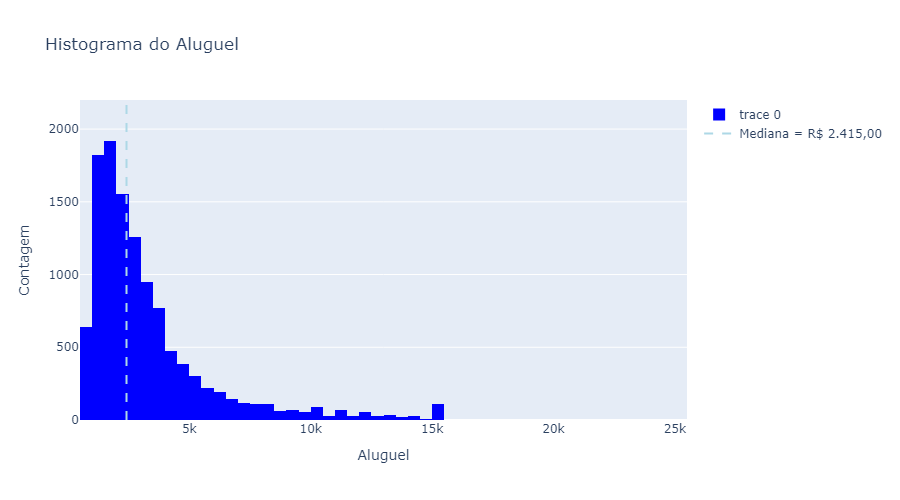

In [106]:
mediana_rent = aptos.rent.median()

mediana_rent_format = (
    "R$ {:,.2f}".format(mediana_rent)
    .replace(",", "v")
    .replace(".", ",")
    .replace("v", ".")
)

data = [go.Histogram(x=aptos.rent,
                     nbinsx=50,
                     marker=dict(color='blue'))]

line = [go.Scatter(x=[mediana_rent, mediana_rent],
                   y=[0,2200],
                   mode='lines',
                   line=dict(color='lightblue', dash='dash'),
                   showlegend=True,
                   name=f"Mediana = {mediana_rent_format}")]

fig = go.Figure(data=data+line)

fig.update_layout(title_text = 'Histograma do Aluguel',
                  xaxis_title = 'Aluguel',
                  yaxis_title='Contagem',
                  autosize=False,
                  width=900,
                  height=500)

fig.update_yaxes(range=[0, 2200])

#fig.show()
display(Image("../data/plotly-imgs/hist_aluguel.jpg"))

Olhando para as estatísticas descritivas do aluguel e do valor do imóvel:

In [107]:
aptos[["rent", "total"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


Tipos de imóveis:

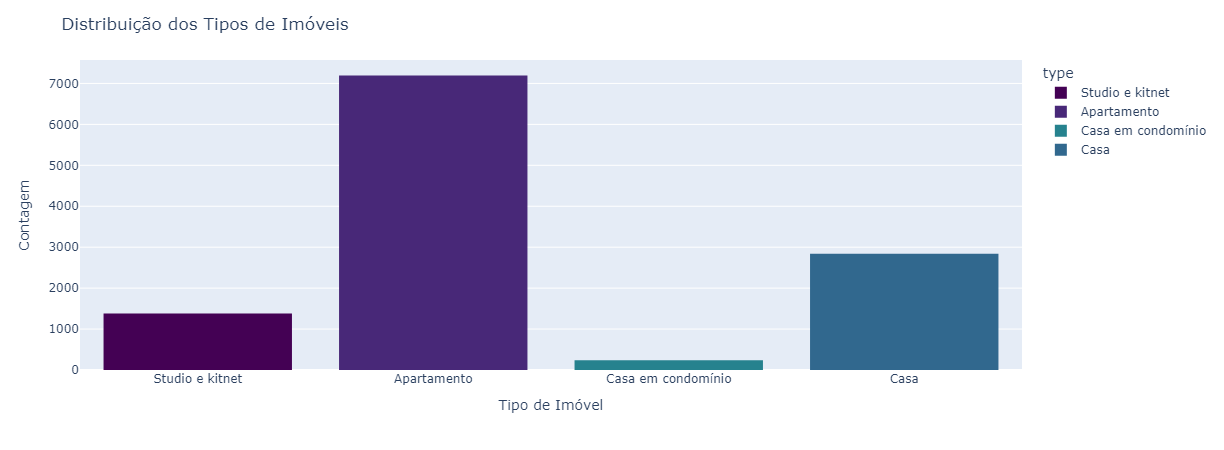

In [108]:
cores_por_tipo = {
    'Studio e kitnet':'#440154',
    'Apartamento':'#482878',
    'Casa em condomínio':'#26828e',
    'Casa':'#31688e'
}

fig = px.histogram(aptos, x="type", color="type", color_discrete_map=cores_por_tipo)
fig.update_layout(title="Distribuição dos Tipos de Imóveis",
                  xaxis_title="Tipo de Imóvel",
                  yaxis_title="Contagem")

#fig.show()
display(Image("../data/plotly-imgs/dist_tipos_imoveis.jpg"))

Como esperado, o número de apartamentos é muito superior aos demais. Isso é esperado numa megalópole como São Paulo. Também é importante destacar que o número de casas em condomínio é baixíssimo. Sendo essas residências mais comuns nas classes mais altas, fica nítida a desigualdade existente na cidade, algo que pudemos ver com a assimetria no histograma dos aluguéis.

Número de quartos e vagas

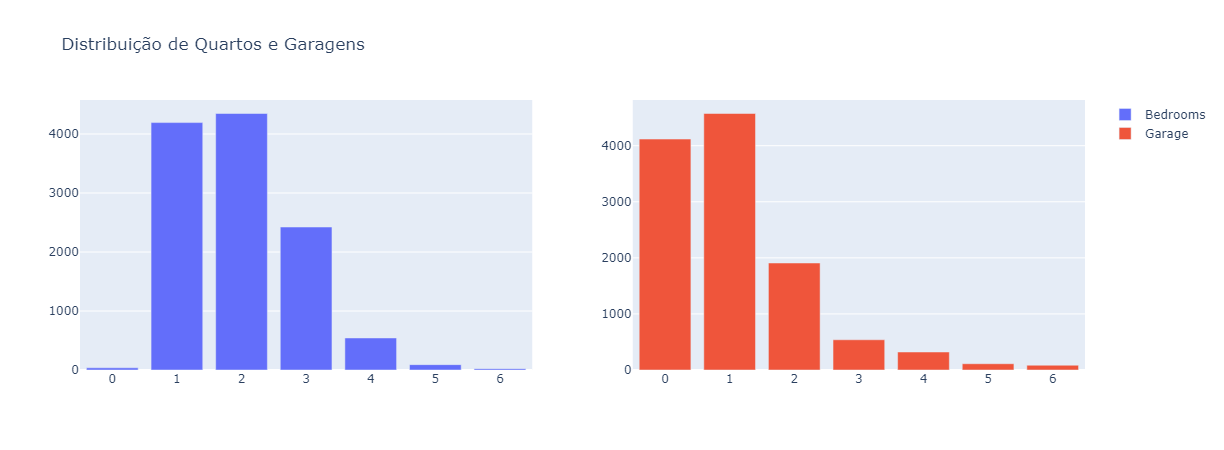

In [109]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=aptos['bedrooms'].value_counts().index,
           y=aptos['bedrooms'].value_counts().values,
           name='Bedrooms'),
           row=1, col=1
)

fig.add_trace(
    go.Bar(x=aptos['garage'].value_counts().index,
           y=aptos['garage'].value_counts().values,
           name='Garage'),
           row=1, col=2
)

fig.update_layout(title="Distribuição de Quartos e Garagens")

fig.update_xaxes(tickmode='linear')

#fig.show()
display(Image("../data/plotly-imgs/dist_quartos_garagens.jpg"))

Para a variável área, vamos explorar algumas estatísticas adicionais:

In [110]:
from tabulate import tabulate

desc = aptos["area"].describe()
desc["var"] = aptos["area"].var()
desc["kurt"] = aptos["area"].kurtosis()
desc = pd.DataFrame(desc)
print(tabulate(desc, headers="keys", tablefmt="psql", showindex=True))

+-------+------------+
|       |       area |
|-------+------------|
| count | 11657      |
| mean  |    84.6557 |
| std   |    74.0205 |
| min   |     0      |
| 25%   |    40      |
| 50%   |    60      |
| 75%   |    96      |
| max   |   580      |
| var   |  5479.04   |
| kurt  |     8.3946 |
+-------+------------+


Com base nas estatísticas geradas, é possível observar que o tamanho médio da área dos apartamentos em São Paulo é de aproximadamente 84.66 metros quadrados. No entanto, o desvio padrão é bastante alto (74.02 metros quadrados), indicando uma grande variação nos tamanhos dos apartamentos. <br>

Podemos notar que há alguma anomalia nos dados, já que temos um apartamento de 0 metros quadrados, algo impossível de acontecer, Isso já liga um alerta para investigar se os dados estão corretos ou se tivemos algum problema nos inputs. <br>

Podemos ver também que a mediana é de 60 metros quadrados, o que é menor que a média, sugerindo que a distribuição dos tamanhos dos apartamentos é inclinada para a direita. Isso é confirmado pelo alto valor da curtose (8.3946), que indica a presença de outliers no lado direito da distribuição. <br>

Além disso, a diferença entre os valores dos quartis superior e inferior (96 - 40 = 56 metros quadrados) sugere que a maior parte dos apartamentos têm áreas entre 40 e 96 metros quadrados. <br>

Em suma, embora a maioria dos apartamentos pareça ter entre 40 e 96 metros quadrados, há uma quantidade significativa de apartamentos que são muito menores ou muito maiores do que isso, e isso é provável que seja o resultado da presença de outliers.

Verificar quantos apartamentos temos com menos de 10 metros quadrados:

In [111]:
print(f"Temos {aptos.query('area < 10').shape[0]} com menos de 10 metros quadrados.")

Temos 7 com menos de 10 metros quadrados.


In [112]:
aptos.query("area < 10")

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


In [113]:
aptos = aptos.query("area >= 10")

Descritiva final para este novo dataset:

In [114]:
aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
area,11650.0,84.705408,74.014919,10.0,40.00,60.0,96.00,580.0
bedrooms,11650.0,1.966266,0.931223,0.0,1.00,2.0,3.00,6.0
garage,11650.0,1.060258,1.132394,0.0,0.00,1.0,2.00,6.0
rent,11650.0,3251.095107,2650.771522,500.0,1590.00,2415.0,3800.00,25000.0
total,11650.0,4080.398627,3352.415415,509.0,1996.25,3057.0,4774.75,28700.0


In [115]:
aptos.describe(include=["O"]).T

,count,unique,top,freq
address,11650,5344,Rua da Consolação,49
district,11650,1199,Bela Vista,352
type,11650,4,Apartamento,7193


Vamos entender melhor os bairros que temos no dataset:

In [116]:
print(f"Temos {aptos.district.nunique()} bairros na amostra.")

Temos 1199 bairros na amostra.


Quais são os bairros com o maior número de imóveis?

In [117]:
top_distritos = aptos.groupby("district").size().sort_values(ascending=False).reset_index(name='contagem')[:10]
top_distritos.columns = ["Distrito", "Contagem"]
print("Os 10 Distritos com mais Imóveis")
print(top_distritos)

Os 10 Distritos com mais Imóveis
          Distrito  Contagem
0       Bela Vista       352
1     Vila Mariana       232
2  Jardim Paulista       220
3           Centro       178
4        Pinheiros       159
5       Consolação       157
6          Santana       152
7            Mooca       147
8      Santo Amaro       146
9        Liberdade       141


Olha que interessante, a maior parte dos distritos são da região central (Bela Vista, Centro e Consolação), ou próximos a eles (Vila Mariana).

E quanto ao preço do aluguel? Como fica o ranking?

In [118]:
top_distritos_rent = aptos.groupby("district")['rent'].mean().sort_values(ascending=False)[:10].reset_index()
top_distritos_rent.columns = ["Destrito", "Média de Aluguel"]

top_distritos_rent["Média de Aluguel"] = top_distritos_rent["Média de Aluguel"]\
.apply(lambda x: "R$ {:,.2f}".format(x))

print("Top 10 Distritos com maior média de aluguel")
print(top_distritos_rent)

Top 10 Distritos com maior média de aluguel
                         Destrito Média de Aluguel
0     Alphaville Residencial Dois     R$ 15,000.00
1                    Jardim Tango     R$ 15,000.00
2     Alphaville Residencial Plus     R$ 15,000.00
3  Residencial Cinco (alphaville)     R$ 13,600.00
4       Alphaville Residencial Um     R$ 13,500.00
5              Jardim dos Estados     R$ 13,125.00
6                   Cidade Jardim     R$ 13,000.00
7                        Pacaembu     R$ 12,054.00
8                   Chácara Meyer     R$ 12,000.00
9      Centro Empresarial Tamboré     R$ 11,833.33


Há muitos distritos de Alphaville no resultado final. Vamos verificar como seria o top 10 sem Alphaville:

In [119]:
distritos_rent = aptos.groupby("district")['rent'].mean().reset_index()
distritos_rent = distritos_rent[~distritos_rent["district"].str.lower().str.contains("alphaville")]
top_distritos_rent = distritos_rent.sort_values('rent', ascending=False)[:10]
top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]
top_distritos_rent["Média de Aluguel"] = top_distritos_rent["Média de Aluguel"]\
.apply(lambda x: "R$ {:,.2f}".format(x))

print("Top 10 Distritos com maior média de aluguel (sem Alphaville)")
print(top_distritos_rent)

Top 10 Distritos com maior média de aluguel (sem Alphaville)
                              Distrito Média de Aluguel
475                       Jardim Tango     R$ 15,000.00
533                 Jardim dos Estados     R$ 13,125.00
101                      Cidade Jardim     R$ 13,000.00
577                           Pacaembu     R$ 12,054.00
82                       Chácara Meyer     R$ 12,000.00
70          Centro Empresarial Tamboré     R$ 11,833.33
505  Jardim Vitoria Regia (zona Oeste)     R$ 11,820.00
248                    Jardim Cordeiro     R$ 11,250.00
85               Chácara Santo Antônio     R$ 10,650.00
83                Chácara Monte Alegre     R$ 10,205.00


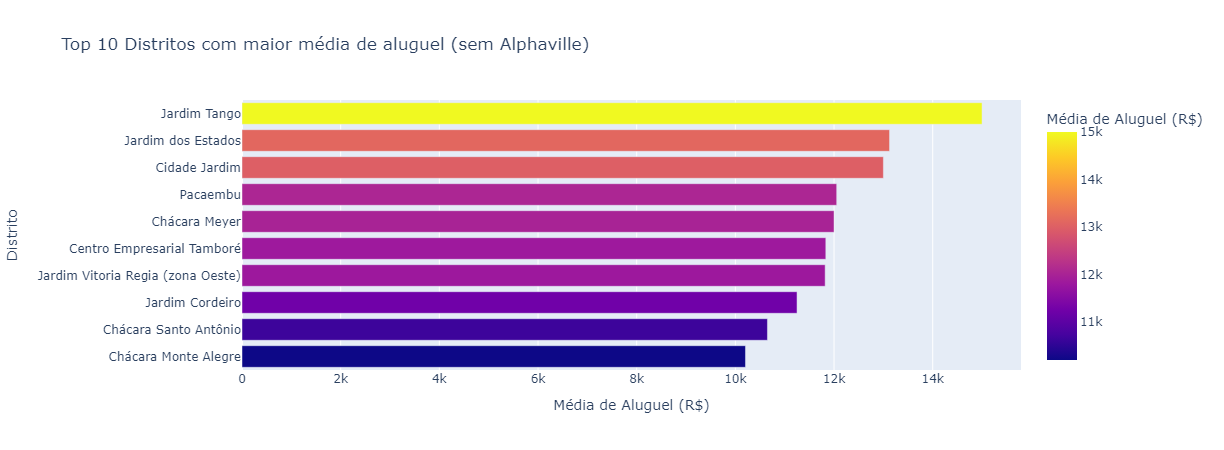

In [120]:
distritos_rent = aptos.groupby("district")['rent'].mean().reset_index()
distritos_rent = distritos_rent[~distritos_rent["district"].str.lower().str.contains("alphaville")]
top_distritos_rent = distritos_rent.sort_values('rent', ascending=False)[:10]
top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

fig = px.bar(top_distritos_rent,
             y="Distrito",
             x="Média de Aluguel",
             orientation='h',
             title="Top 10 Distritos com maior média de aluguel (sem Alphaville)",
             labels={"Média de Aluguel":"Média de Aluguel (R$)", "Distrito":"Distrito"},
             color="Média de Aluguel")

fig.update_yaxes(autorange="reversed")

#fig.show()
display(Image("../data/plotly-imgs/top10_distritos_maior_aluguel.jpg"))

In [121]:
top_distritos_rent.describe()

,Média de Aluguel
count,10.000000
mean,12093.733333
std,1368.205816
min,10205.000000
25%,11392.500000
50%,11916.666667
75%,12763.500000
max,15000.000000


Antes de mais nada, podemos ver que existe uma distância relevante entre o primeiro e o 10° bairro do ranking, sendo que o Jardim Tango tem uma média de aluguel próxima de 1,5x a média da Chácara Monte Alegre. Olhando somente para o top 10, um público já bastante restrito, temos um desvio padrão de R$1.368,21 - valor considerável para um grupo tão pequeno. <br>

Vejamos a distribuição dos bairros com imóveis mais caros, de acordo com as zonas: <br>
- Zona Leste: Jardim Tango
- Zona Oeste: Pacaembu, Jardim Vitória Régia, Centro Empresarial Tamboré
- Zona Sul: Jardim dos Estados, Cidade Jardim, Chácara Meyer, Jardim Cordeiro, Chácara Santo Ântonio, Chácara Monte Alegre <br>

Em outras palavras, a Zona Sul é onde há os imóveis mais caros da cidade, seguido da Zona Oeste, Leste e Norte. Entretanto, há diversos contrastes sociais na cidade. Sabemos, por exemplo, que a região central é uma das mais requisitadas, ainda que não tenhamos nenhum bairro no top 10. Adicionalmente, é importante pontuar sempre a variância enorme em cada bairro, já que na Zona Sul temos bairros de classes altas, mas também diversos bairros onde predominam moradores de renda mais baixa, como a famosa Favela de Paraisópolis - que, além de tudo, tem fronteira com os luxuosos condomínios Jardim Vitória Régia, Paço dos Reis e Portal do Morumbi.

Antes de seguir para olhar os imóveis do top 10, vamos olhar os "bottom 10", o top 10 dos mais baratos:

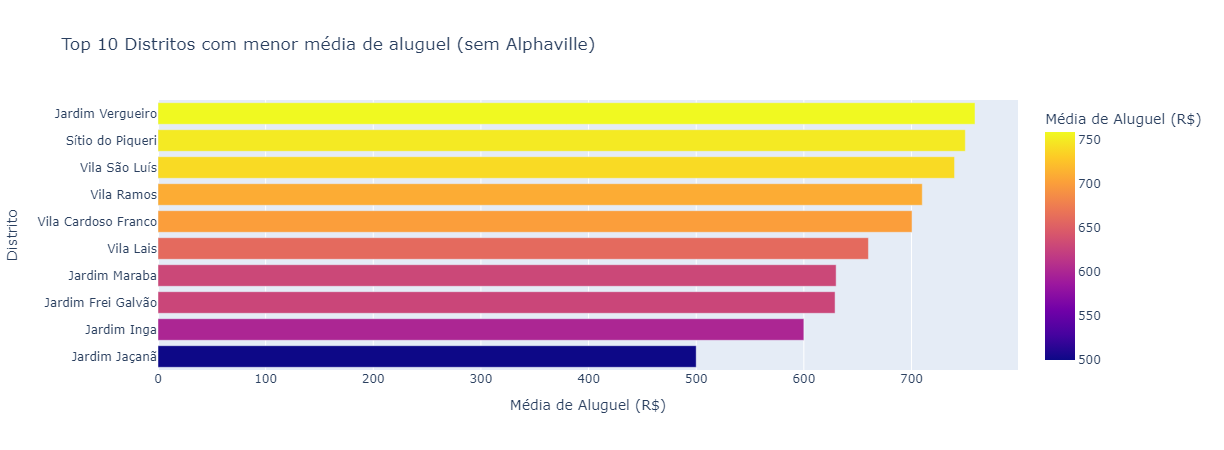

In [122]:
bottom_distritos_rent = distritos_rent.sort_values("rent", ascending=True)[:10]
bottom_distritos_rent = bottom_distritos_rent.sort_values("rent", ascending=False)
bottom_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

fig = px.bar(bottom_distritos_rent,
             y="Distrito",
             x="Média de Aluguel",
             orientation='h',
             title="Top 10 Distritos com menor média de aluguel (sem Alphaville)",
             labels={"Média de Aluguel":"Média de Aluguel (R$)", "Distrito":"Distrito"},
             color="Média de Aluguel")

fig.update_yaxes(autorange="reversed")

#fig.show()
display(Image("../data/plotly-imgs/top10_distritos_menor_aluguel.jpg"))

In [123]:
bottom_distritos_rent.describe()

,Média de Aluguel
count,10.000000
mean,667.850000
std,80.888143
min,500.000000
25%,629.250000
50%,680.250000
75%,732.500000
max,759.000000


Novamente, vamos olhar por zonas: <br>

- Zona Leste: Vila Cardoso Franco, Vila Lais, Jardim Frei Galvão
- Zona Oeste: Vila São Luis, Vila Ramos
- Zona Sul: Jardim Vergueiro, Jardim Maraba, Jardim Inga
- Zona Norte: Sítio do Piqueri, Jardim Jaçana <br>

Podemos ver que a distribuição mudou bastante, sendo que a Zona Leste aparece com maior presença neste ranking, algo já esperado, pois é o local mais periférico de São Paulo. Como destaque para a desigualdade, vemos que a Zona Sul também aparece no ranking, como a 2° zona mais presente. <br>

Vemos que aqui a dispersão também é bem alta, com o desvio padrão ficando em cerca de 81 reais, para um grupo onde a média dos aluguéis é de apenas R$ 667,85.

Hora de comparar os bairros ricos com os bairros pobres. Porém, top 10 é muito pouco para ter um noção real da diferença dos imóveis das diferentes classes. Sendo assim, vamos fazer as comparações usando o top 50 dos mais caros e dos mais baratos.

In [124]:
# 50 bairros mais caros (excluindo Alphaville)
top_distritos_rent = distritos_rent.sort_values("rent", ascending=False)[:50]
top_distritos_rent.columns = ["Distrito", "Média de Aluguel"]
top_aptos = aptos[aptos["district"].isin(top_distritos_rent["Distrito"])]

# 50 bairros mais baratos
bottom_distritos_rent = distritos_rent.sort_values("rent", ascending=True)[:50]
bottom_distritos_rent.columns = ["Distrito", "Média de Aluguel"]
bottom_aptos = aptos[aptos["district"].isin(bottom_distritos_rent["Distrito"])]

display(top_aptos.head()), display(bottom_aptos.head())

,address,district,area,bedrooms,garage,type,rent,total
105,Rua Oscar Freire,Cerqueira César,55,2,0,Apartamento,3950,5097
179,Rua Padre Lebret,Jardim Leonor,87,1,2,Apartamento,4500,6010
200,Rua Camargo Aranha,Pacaembu,350,4,2,Casa,10400,11660
249,Rua Pamplona,Cerqueira César,49,1,1,Apartamento,3000,3967
278,Rua Augusta,Cerqueira César,35,1,1,Apartamento,2800,3661


,address,district,area,bedrooms,garage,type,rent,total
219,Rua Adele Zarzur,Jardim São José (zona Norte),50,1,0,Casa,850,887
489,Rua das Águias Reais,Vila Cardoso Franco,50,2,1,Apartamento,791,1212
538,Rua Celeste Fernandes Dalphorno,Jardim Rosana,40,1,0,Casa,800,949
639,Rua Ulisses Paschoal,Jardim Lourdes (zona Sul),15,1,0,Studio e kitnet,882,1009
1005,Rua Amorim Castro,Vila São Luís,15,1,0,Studio e kitnet,740,1196


(None, None)

Agora, vamos olhar como os aluguéis destes bairros estão distantes:

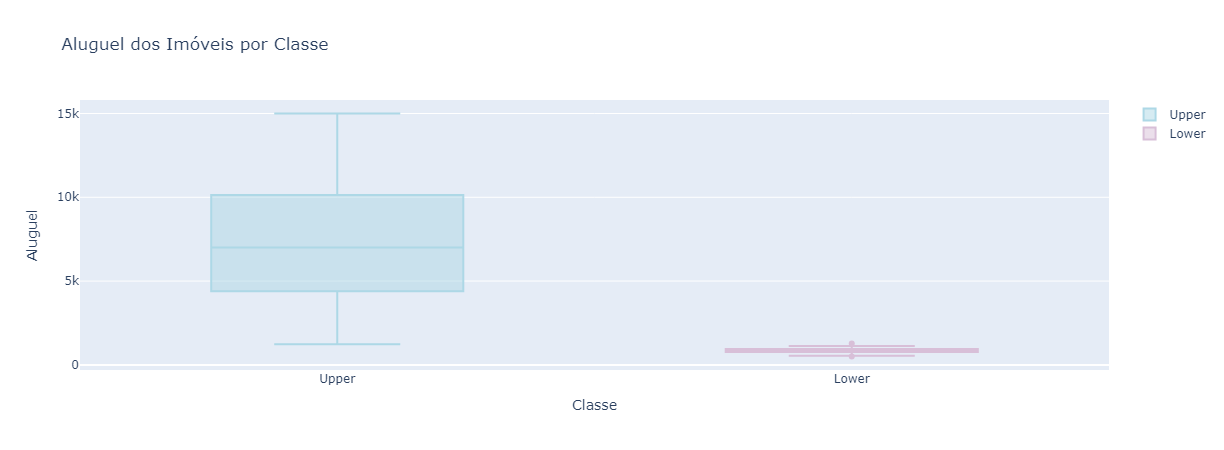

In [125]:
top_aptos["class"] = "Upper"
bottom_aptos["class"] = "Lower"

fig = go.Figure()

fig.add_trace(go.Box(
    x=top_aptos["class"],
    y=top_aptos["rent"],
    name="Upper",
    boxpoints="outliers",
    marker_color="lightblue"
))

fig.add_trace(go.Box(
    x=bottom_aptos["class"],
    y=bottom_aptos["rent"],
    name="Lower",
    boxpoints="outliers",
    marker_color="thistle"
))

fig.update_layout(
    xaxis=dict(title="Classe"),
    yaxis=dict(title="Aluguel"),
    title="Aluguel dos Imóveis por Classe",
    showlegend=True
)

#fig.show()
display(Image("../data/plotly-imgs/aluguel_imoveis_classe.jpg"))

E quando olhamos por tipo de imóvel:

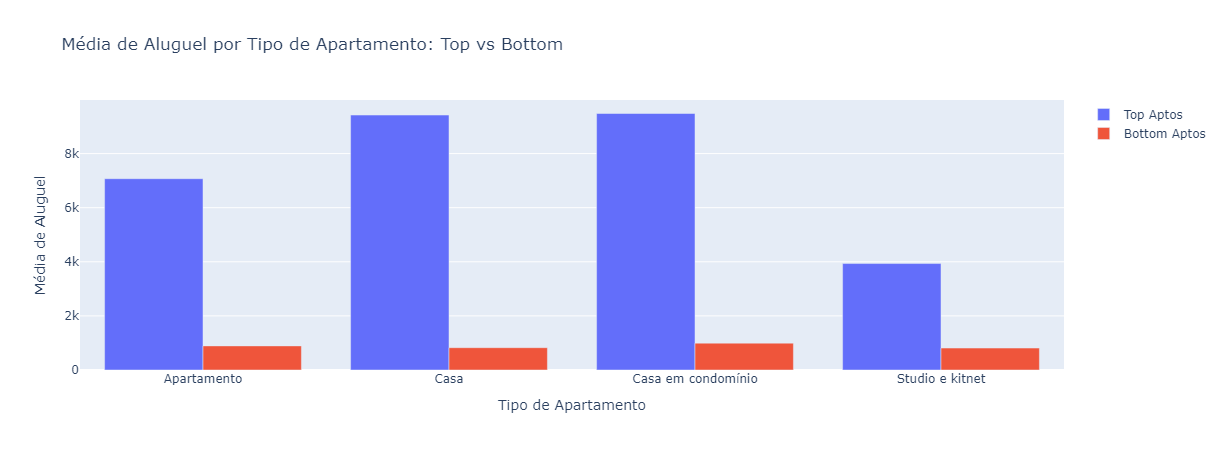

In [126]:
rent_by_type_top = top_aptos.groupby("type")["rent"].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby("type")["rent"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rent_by_type_top["type"],
    y=rent_by_type_top["rent"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=rent_by_type_bottom["type"],
    y=rent_by_type_bottom["rent"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Média de Aluguel por Tipo de Apartamento: Top vs Bottom",
    xaxis_title="Tipo de Apartamento",
    yaxis_title="Média de Aluguel"
)

#fig.show()
display(Image("../data/plotly-imgs/media_aluguel_tipo_apto.jpg"))

Podemos ver que a distância dos valores de aluguel dos studios e kitnets não chegam a ser tão distantes quanto os das casas. De certa forma, é esperado que um studio num bairro nobre seja mais varo somente pela localização, já que o tamanho não consegue expandir. Por outro lado, a casa pode ser valorizada tanto pela localização, quanto por sua estrutura, fazendo o preço subir até 10x mais.

Inclusive, podemos validar isso olhando para a área dos imóveis:

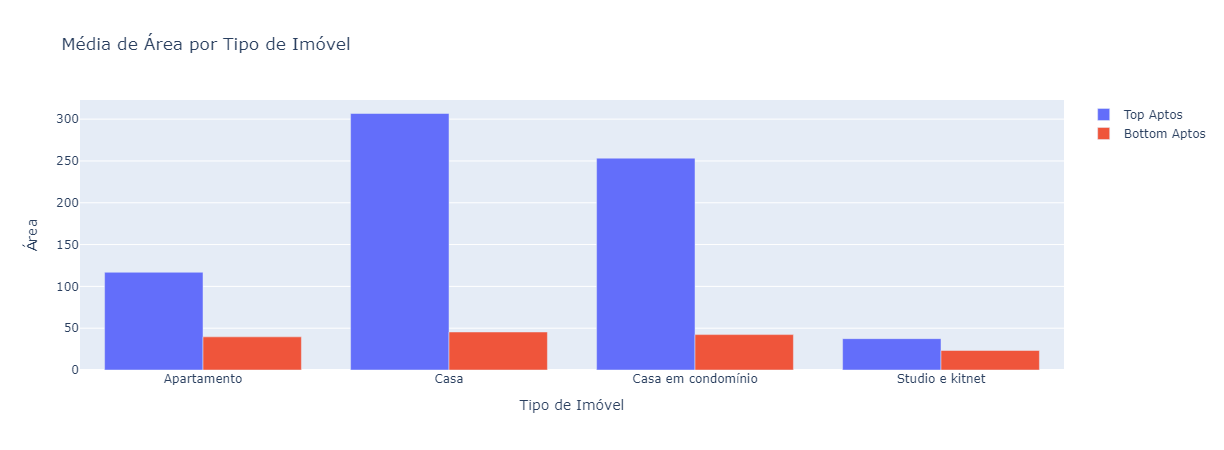

In [127]:
rent_by_type_top = top_aptos.groupby("type")["area"].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby("type")["area"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rent_by_type_top["type"],
    y=rent_by_type_top["area"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=rent_by_type_bottom["type"],
    y=rent_by_type_bottom["area"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Média de Área por Tipo de Imóvel",
    xaxis_title="Tipo de Imóvel",
    yaxis_title="Área"
)

#fig.show()
display(Image("../data/plotly-imgs/media_area_tipo_imovel.jpg"))

Como havíamos cogitado, a diferença do tamanho das casas de bairros de diferentes classes sociais é bem maior que a diferença no tamanho de apartamentos, studios e kitnets. Isso explica a diferença no preço ser muito mais agressiva.

Quantidade de imóveis por número de quartos:

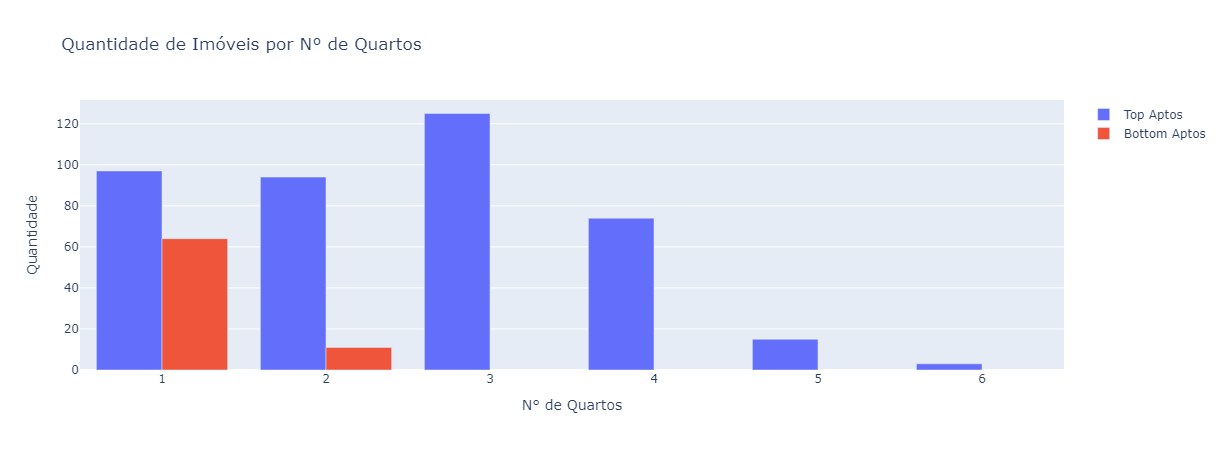

In [128]:
top_aptos_bedrooms = top_aptos["bedrooms"].value_counts().reset_index()
top_aptos_bedrooms.columns = ["N° de Quartos", "Quantidade"]
top_aptos_bedrooms = top_aptos_bedrooms.sort_values(by="N° de Quartos", ascending=True)

bottom_aptos_bedrooms = bottom_aptos["bedrooms"].value_counts().reset_index()
bottom_aptos_bedrooms.columns = ["N° de Quartos", "Quantidade"]
bottom_aptos_bedrooms = bottom_aptos_bedrooms.sort_values(by="N° de Quartos", ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_aptos_bedrooms["N° de Quartos"],
    y=top_aptos_bedrooms["Quantidade"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=bottom_aptos_bedrooms["N° de Quartos"],
    y=bottom_aptos_bedrooms["Quantidade"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Quantidade de Imóveis por N° de Quartos",
    xaxis_title="N° de Quartos",
    yaxis_title="Quantidade"
)

#fig.show()
display(Image("../data/plotly-imgs/qtd_imoveis_n_quartos.jpg"))


Quantidade de imóveis por número de vagas na garagem:

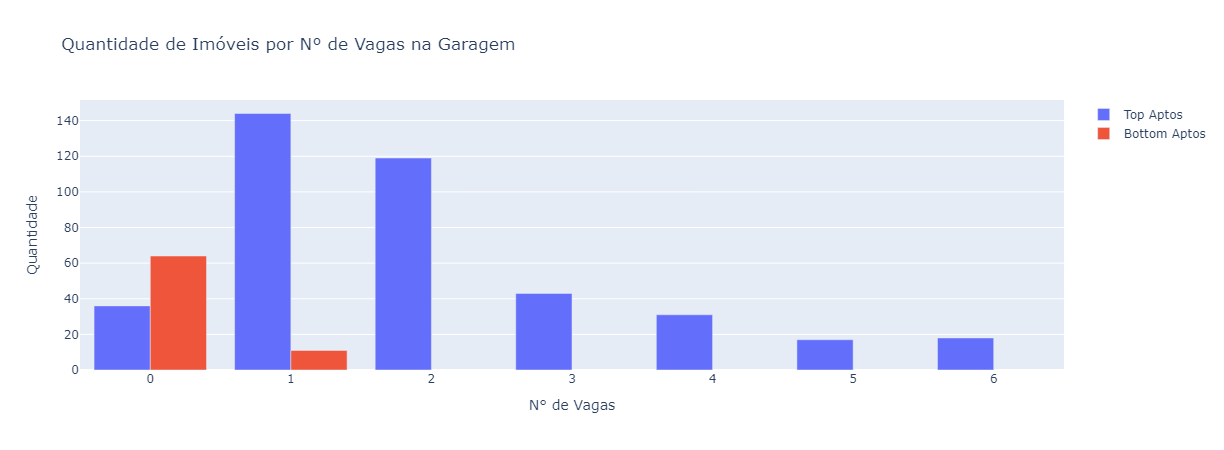

In [129]:
top_aptos_garage = top_aptos["garage"].value_counts().reset_index()
top_aptos_garage.columns = ["N° de Vagas", "Quantidade"]
top_aptos_garage = top_aptos_garage.sort_values(by="N° de Vagas", ascending=True)

bottom_aptos_garage = bottom_aptos["garage"].value_counts().reset_index()
bottom_aptos_garage.columns = ["N° de Vagas", "Quantidade"]
bottom_aptos_garage = bottom_aptos_garage.sort_values(by="N° de Vagas", ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_aptos_garage["N° de Vagas"],
    y=top_aptos_garage["Quantidade"],
    name="Top Aptos"
))

fig.add_trace(go.Bar(
    x=bottom_aptos_garage["N° de Vagas"],
    y=bottom_aptos_garage["Quantidade"],
    name="Bottom Aptos"
))

fig.update_layout(
    title="Quantidade de Imóveis por N° de Vagas na Garagem",
    xaxis_title="N° de Vagas",
    yaxis_title="Quantidade"
)

#fig.show()
display(Image("../data/plotly-imgs/qtd_imoveis_n_garagens.jpg"))

Relações entre features numéricas:

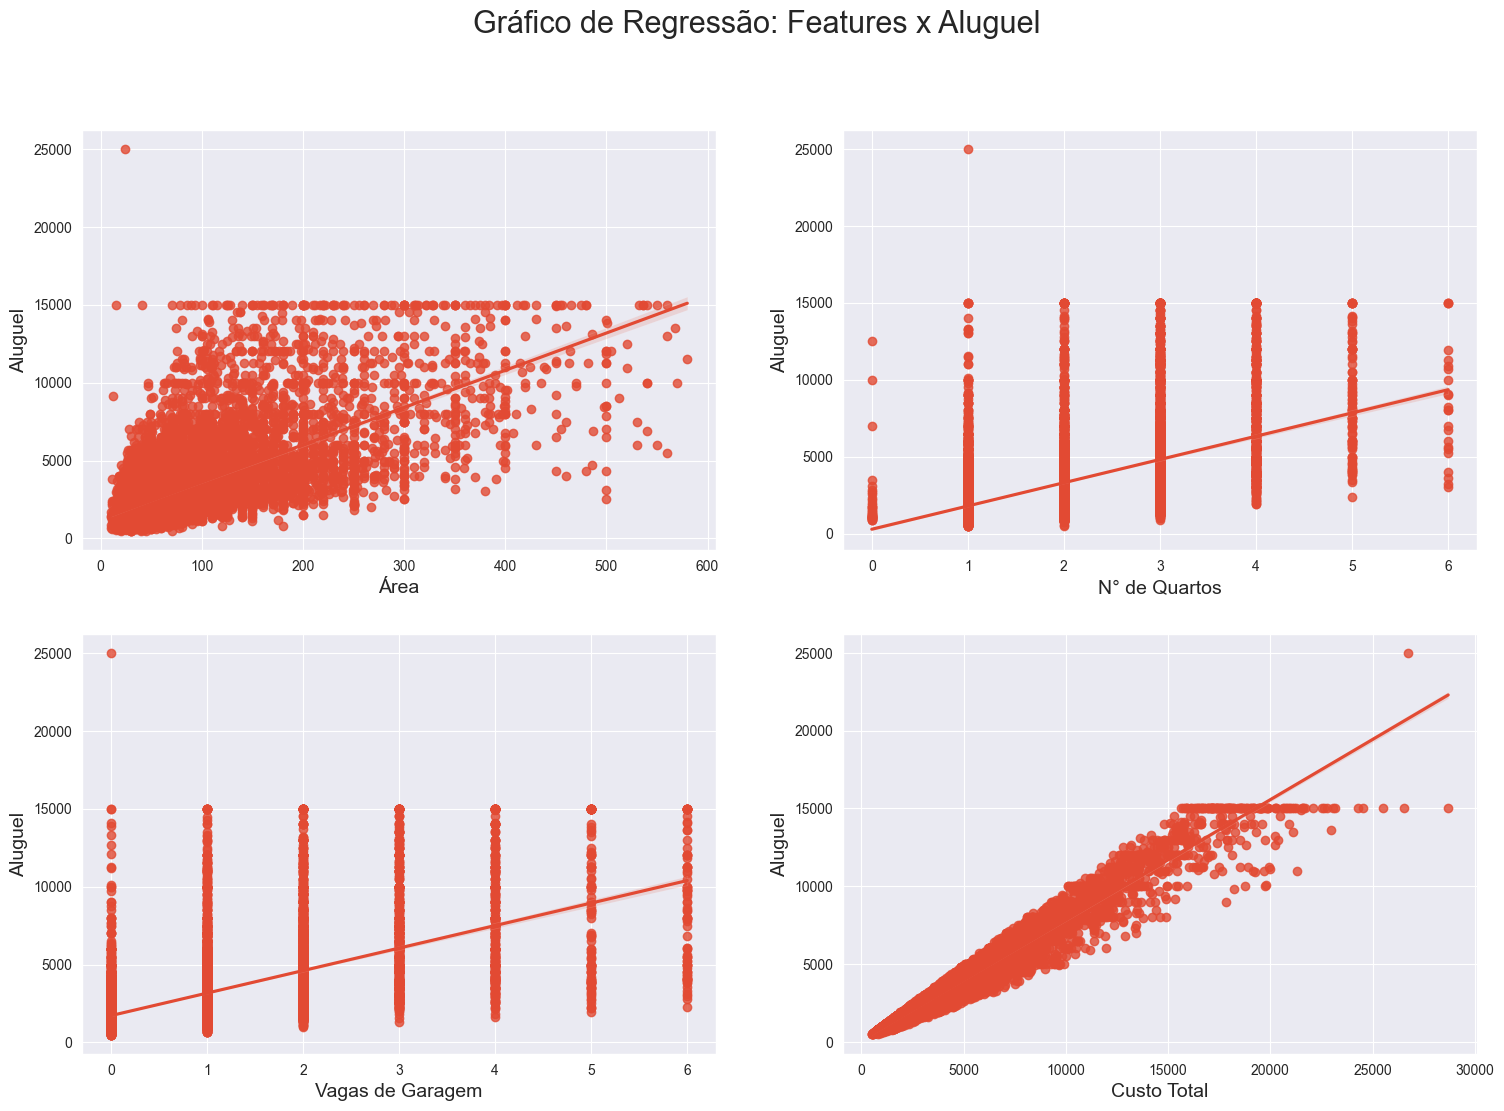

In [130]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

_ = sns.regplot(x="area", y="rent", data=aptos, ax=axs[0, 0])
_ = sns.regplot(x="bedrooms", y="rent", data=aptos, ax=axs[0, 1])
_ = sns.regplot(x="garage", y="rent", data=aptos, ax=axs[1, 0])
_ = sns.regplot(x="total", y="rent", data=aptos, ax=axs[1, 1])

_ = axs[0, 0].set_xlabel("Área", fontsize=14)
_ = axs[0, 0].set_ylabel("Aluguel", fontsize=14)
_ = axs[0, 1].set_xlabel("N° de Quartos", fontsize=14)
_ = axs[0, 1].set_ylabel("Aluguel", fontsize=14)
_ = axs[1, 0].set_xlabel("Vagas de Garagem", fontsize=14)
_ = axs[1, 0].set_ylabel("Aluguel", fontsize=14)
_ = axs[1, 1].set_xlabel("Custo Total", fontsize=14)
_ = axs[1, 1].set_ylabel("Aluguel", fontsize=14)

_ = fig.suptitle("Gráfico de Regressão: Features x Aluguel", fontsize=22)

_ = plt.show()

Não parece que existem correlações fortes, com exceção do Custo Total e do Aluguel, o que é explicado por um ser parte do outro. Mesmo assimo, vamos verificar a matriz de correlação:

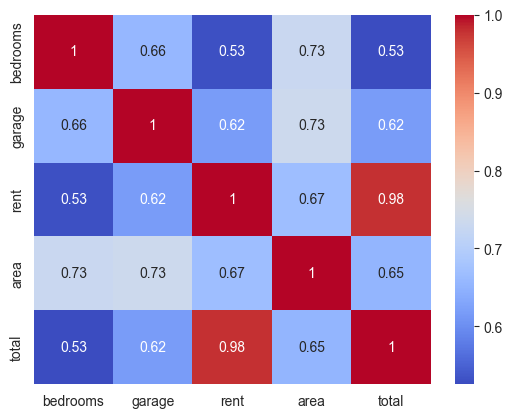

In [131]:
subset_aptos = aptos[['bedrooms', 'garage', 'rent', 'area', 'total']]

correlation_matrix = subset_aptos.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

Veja que os gráficos de dispersão escondem correlações relevantes, sendo que a menor correlação que vemos com aluguel é a de número de quartos, que ainda assim é de 53%. Existem inúmeras tabelas, mas partindo da tabela do cientista da computação e diretor de ML do Linkedin, Parvez Ahammad, vemos que as correlações estão todas entre moderada e alta.

Por fim, podemos olhar a variação do preço por tipo de imóvel, mas também por quartos e vagas na garagem, ambas colunas numéricas que podem ser vistas como categóricas, devido ao restrito número de valores únicos que apresentam:

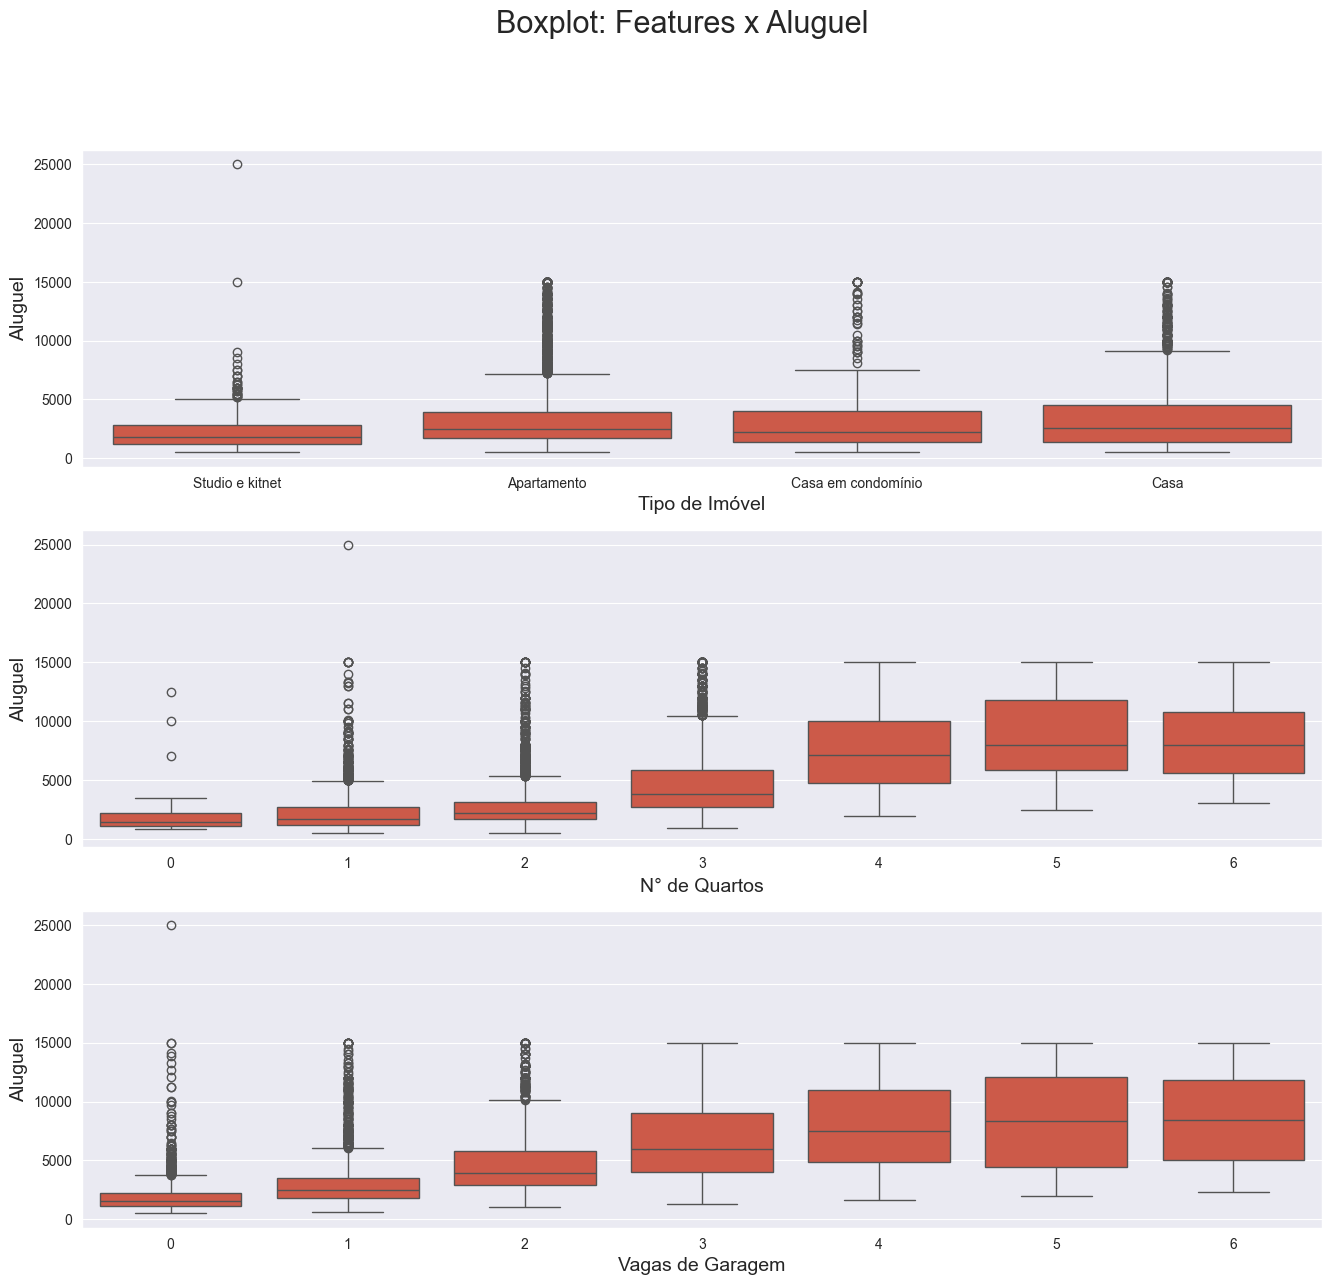

In [132]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(3, 1, figsize=(16, 14))

_ = sns.boxplot(x="type", y="rent", data=aptos, ax=axs[0])
_ = sns.boxplot(x="bedrooms", y="rent", data=aptos, ax=axs[1])
_ = sns.boxplot(x="garage", y="rent", data=aptos, ax=axs[2])

_ = axs[0].set_xlabel("Tipo de Imóvel", fontsize=14)
_ = axs[0].set_ylabel("Aluguel", fontsize=14)
_ = axs[1].set_xlabel("N° de Quartos", fontsize=14)
_ = axs[1].set_ylabel("Aluguel", fontsize=14)
_ = axs[2].set_xlabel("Vagas de Garagem", fontsize=14)
_ = axs[2].set_ylabel("Aluguel", fontsize=14)

_ = fig.suptitle("Boxplot: Features x Aluguel", fontsize=22)

_ = plt.show()

Apesar de parecer existir uma diferença nos valores de aluguel por tipo de imóvel (algo já visto anteriormente, mas separado por classe social), o boxplot não ajudou muito, devido à alta dispersão dos valores. Então, mesmo sendo uma medida que pode enganar, vamos olhar a média por tipo de imóvel, para termos algum direcionamento de como os valores mudam:

In [133]:
aptos.groupby("type")["rent"].mean()

type
Apartamento           3357.146948
Casa                  3474.387734
Casa em condomínio    3893.437500
Studio e kitnet       2127.563043
Name: rent, dtype: float64

Como esperado, casas em condomínio são as mais caras e os studios/kitnets são os mais baratos.

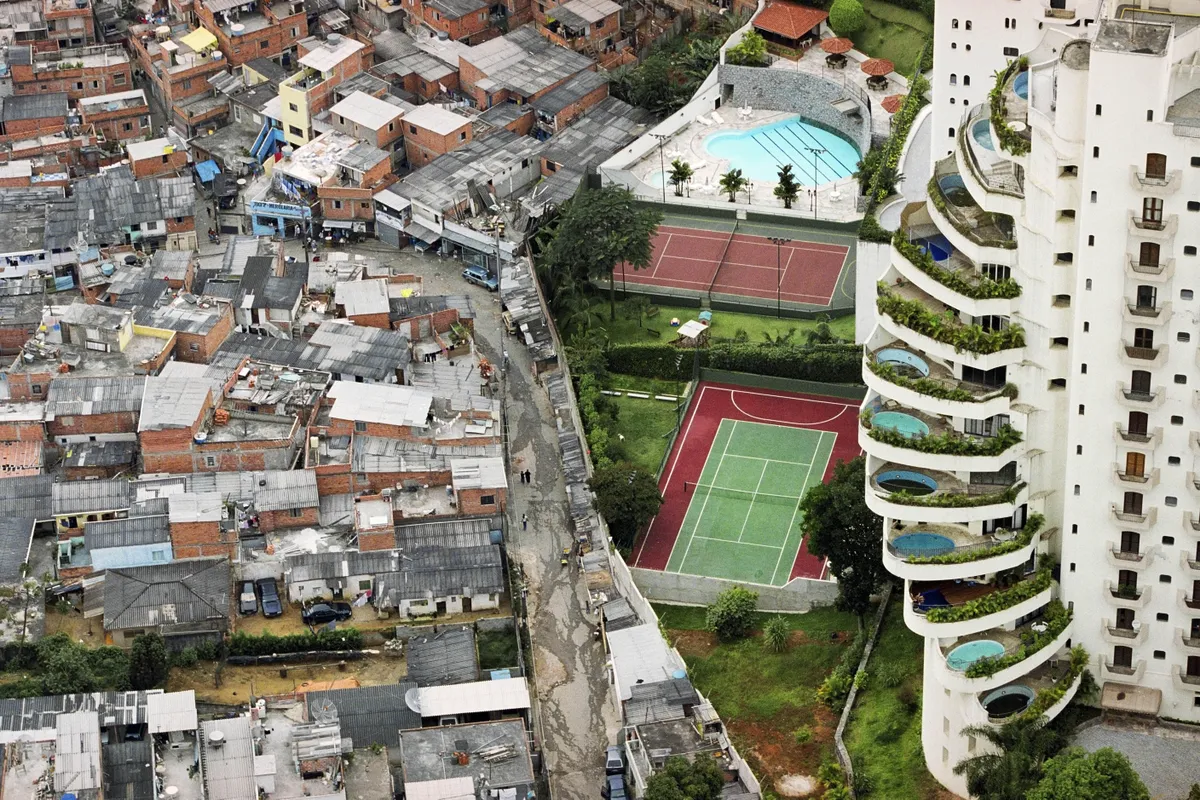

In [134]:
display(Image("../data/imoveis_sp.jpg"))

A análise expôs diversas evidências acerca dos imóveis de São Paulo, demonstrando principalmente como a desigualdade social se apresenta em detalhes que muitas vezes passam batido. Alguns dos principais insights:
- O Alphaville é a região com os aluguéis mais caros de São Paulo. Quando excluímos o bairro, temos a Zona Sul concentrando a maioria dos bairros mais valorizados de São Paulo. A Zona Norte, em contra partida, não possui nenhum bairro no top 10 dos bairros com os aluguéis mais caros.
- Quando olhamos para os bairros mais baratos, a Zona Leste e a Zona Sul empatam no top 10, ambas com 3 bairros cada. A Zona Oeste e a Zona Norte possuem ambas 2 bairros cada no top. A aparição da Zona Sul nos 2 top, mais caros e mais baratos, evidência como a desigualdade social ocorre na cidade, tendo prédios luxuosos e favelas disputando os mesmos espaços em diversas situações.
- Quando olhamos para o aluguel, a região pode encarecer sim o seu preço, mas há um limite para isso. Tanto é que a distância do aluguel de bairros mais baratos para os mais caros chega a ser de 1000% para casas, enquanto que para studios e kitnets, cujo espaço é limitado mesmo em bairros mais caros, acaba ficando em torno de 400%.
- A diferença entre os imóveis dos bairros mais caros para os bairros mais ricos é bastante evidente pelo número de quartos e de vagas na garagem. Vemos que a maioria dos imóveis nos 50 bairros mais baratos sequer possui vaga na garagem e, quando possui, limita-se a uma vaga. Nos bairros mais caros, entretanto, há imovéis com até 6 vagas na garagem.
- As características dos imóveis são bons preditores do aluguel. Como podemos ver pela matriz de correlação, todas tiveram correlação entre alta e moderada com o valor do aluguel.